In [ ]:
import pandas as pd

In [ ]:
dt = pd.read_csv('/content/seattle-weather.csv')

In [ ]:
dt.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
dt.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
dt.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [ ]:
dt['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
dt['weather'] = lb.fit_transform(dt['weather'] )

In [ ]:

dt['date'] = pd.to_datetime(dt['date'])

reference_date = pd.to_datetime('2012-01-01')

dt['date'] = (dt['date'] - reference_date).dt.days

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_columns = ['date','precipitation','temp_max','temp_min','wind']
dt[feature_columns] = scaler.fit_transform(dt[feature_columns])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Assuming dt is your DataFrame containing the dataset
x_columns = ['date', 'precipitation', 'temp_max', 'temp_min', 'wind']
y_column = 'weather'

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(dt[x_columns].values, dt[y_column].values, test_size=0.2, random_state=42)

# Reshape input features for SimpleRNN
x_train_reshaped = x_train.reshape(-1, len(x_columns), 1)
x_val_reshaped = x_val.reshape(-1, len(x_columns), 1)

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(32, input_shape=(len(x_columns), 1)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model with validation data
history = model.fit(x_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(x_val_reshaped, y_val))

Epoch 1/20
37/37 [==============================] - 3s 23ms/step - loss: 7.5802 - val_loss: 5.2720
Epoch 2/20
37/37 [==============================] - 0s 8ms/step - loss: 2.4624 - val_loss: 1.3807
Epoch 3/20
37/37 [==============================] - 0s 8ms/step - loss: 1.3049 - val_loss: 1.2409
Epoch 4/20
37/37 [==============================] - 0s 9ms/step - loss: 1.2472 - val_loss: 1.1983
Epoch 5/20
37/37 [==============================] - 0s 9ms/step - loss: 1.2188 - val_loss: 1.1646
Epoch 6/20
37/37 [==============================] - 0s 13ms/step - loss: 1.1827 - val_loss: 1.1299
Epoch 7/20
37/37 [==============================] - 0s 9ms/step - loss: 1.1613 - val_loss: 1.1025
Epoch 8/20
37/37 [==============================] - 0s 7ms/step - loss: 1.1371 - val_loss: 1.0768
Epoch 9/20
37/37 [==============================] - 0s 6ms/step - loss: 1.1167 - val_loss: 1.0599
Epoch 10/20
37/37 [==============================] - 0s 10ms/step - loss: 1.0995 - val_loss: 1.0631
Epoch 11/20
37/3

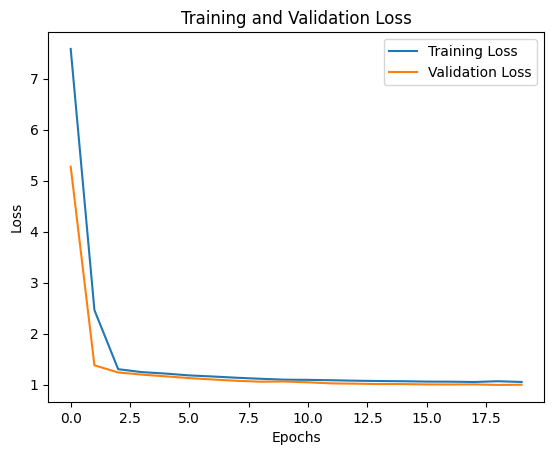

In [ ]:
import matplotlib.pyplot as plt
hist_df=pd.DataFrame(history.history)


plt.plot(hist_df['loss'], label='Training Loss')
plt.plot(hist_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_val)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_val, y_pred)
print(f"The mean absolute error :  {mae}")


10/10 [==============================] - 0s 2ms/step
The mean absolute error :  0.7717845651476863


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dense



model = Sequential()
model.add(LSTM(32, input_shape=(5, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history2 = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
37/37 [==============================] - 3s 19ms/step - loss: 8.2883 - val_loss: 7.2525
Epoch 2/20
37/37 [==============================] - 0s 5ms/step - loss: 4.2811 - val_loss: 1.5248
Epoch 3/20
37/37 [==============================] - 0s 5ms/step - loss: 1.5485 - val_loss: 1.4961
Epoch 4/20
37/37 [==============================] - 0s 5ms/step - loss: 1.4795 - val_loss: 1.4451
Epoch 5/20
37/37 [==============================] - 0s 5ms/step - loss: 1.4596 - val_loss: 1.4331
Epoch 6/20
37/37 [==============================] - 0s 5ms/step - loss: 1.4453 - val_loss: 1.4113
Epoch 7/20
37/37 [==============================] - 0s 5ms/step - loss: 1.4352 - val_loss: 1.3976
Epoch 8/20
37/37 [==============================] - 0s 5ms/step - loss: 1.4242 - val_loss: 1.3980
Epoch 9/20
37/37 [==============================] - 0s 5ms/step - loss: 1.4101 - val_loss: 1.3817
Epoch 10/20
37/37 [==============================] - 0s 5ms/step - loss: 1.4044 - val_loss: 1.3692
Epoch 11/20
37/37 

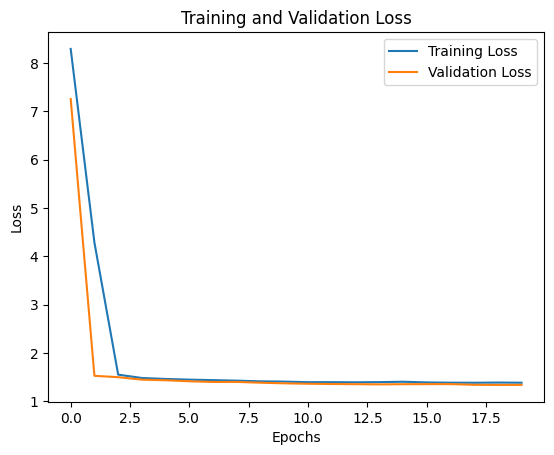

In [ ]:
import matplotlib.pyplot as plt

hist_df=pd.DataFrame(history2.history)

plt.plot(hist_df['loss'], label='Training Loss')
plt.plot(hist_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_val)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_val, y_pred)
print(f"The mean absolute error :  {mae}")

10/10 [==============================] - 1s 4ms/step
The mean absolute error :  1.0544561648124722


In [ ]:

english_to_german = {
    "hello": "hallo",
    "world": "Welt",
    "good": "gut",
    "morning": "Morgen",
    "afternoon": "Nachmittag",
    "evening": "Abend",

}


def translate_to_german(sentence):
    translated_sentence = []
    words = sentence.lower().split()
    for word in words:
        if word in english_to_german:
            translated_sentence.append(english_to_german[word])
        else:

            translated_sentence.append(word)
    return " ".join(translated_sentence)


english_sentence = input("Enter the English sentence: ")

german_translation = translate_to_german(english_sentence)


print("English:", english_sentence)
print("German:", german_translation)


Enter the English sentence: hello good morning
English: hello good morning
German: hallo gut Morgen
